Get input from the user:

In [0]:
while True:
    try:
        s=input('')
    except EOFError:
        break


##Binary Tree

In [0]:
class BinaryTree:    
    def __init__(self,key):
        self.key = key
        self.left = None
        self.right = None

    def insertLeft(self,newNode):
        if self.left == None:
            self.left = BinaryTree(newNode)
        else:
            temp = BinaryTree(newNode)
            temp.left = self.left
            self.left = temp

    def insertRight(self,newNode):
        if self.right == None:
            self.right = BinaryTree(newNode)
        else:
            temp = BinaryTree(newNode)
            temp.right = self.right
            self.right = temp

    def getLeftChild(self):
        return self.left
    
    def getRightChild(self):
        return self.right

    def setRootVal(self,key):
        self.key=key

    def getRootVal(self):
        return self.key
    
r = BinaryTree('a')
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')
print(r.getLeftChild())
print(r.getLeftChild().getRootVal())
r.insertRight('c')
print(r.getRightChild())
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello')
print(r.getRightChild().getRootVal())


a
None
b
c
hello


## Tree Traversal

Three ways to visit nodes:

* preorder: Root-Left-Right
* inorder: Left-Root-Right
* postorder: Left-Right-Root

Watch this for details regarding next images:
[link text](https://www.youtube.com/watch?v=98AGQU0z2wg&list=PLUVuIyC7hOz72uzMsvyz9yH_txj1zCqc4&index=67&t=18s)

In [0]:
# show googledrive images by just change the 
# open?id to uc?id in the sharable link and it will instantly work.
from IPython.display import Image
#Image(url= "https://i.ytimg.com/vi/WLvU5EQVZqY/maxresdefault.jpg", width=600)
Image(url="https://drive.google.com/uc?id=1UOcK2-tHHlJvDs2EPWK9ukA4ZhhKYzSE", width=400)


In [0]:

from IPython.display import Image
Image(url="https://drive.google.com/uc?id=1m3Za7eCAV2jqtwuijta7vuLPcsK8RMa2", width=400)


In [0]:
# preorder: Root-Left-Right
# inorder: Left-Root-Right
# postorder: Left-Right-Root

def preorder(tree):
    if tree:
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())

def inorder(tree):
    if tree:
        inorder(tree.getLeftChild())
        print(tree.getRootVal())
        inorder(tree.getRightChild())

def postorder(tree):
    if tree:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())


# Fully paranthesized math expresion (calculator)

In [0]:
from pythonds.basic import Stack
from pythonds.trees import BinaryTree

def buildParseTree(mathString):
    explist = mathString.split() # convert stringto list of chars
    
    expTree = BinaryTree('') #This is the tree we return
    currentTree = expTree # this is a work in progress version of tree

    stackparent = Stack() #push the parent: keep track of parent node for +-x/
    stackparent.push(expTree) # we pop the parent for +-x/ when we see numbers
                         
    
    for i in explist:
        if i == '(':
            #create new trees that later will be filled by+-*int
            currentTree.insertLeft('') #insert '' placeholder
            #saving root of that tree
            stackparent.push(currentTree) #stack currentTree
            #updating the tree current root, making it ready for next operation
            currentTree = currentTree.getLeftChild() #next node

        elif i in ['+', '-', '*', '/']:
            currentTree.setRootVal(i)  #fill in the current node in the tree
            currentTree.insertRight('') #creat a placeholder new node at right
            stackparent.push(currentTree)
            #updating the tree current root, making it ready for next operation
            currentTree = currentTree.getRightChild()

        elif i == ')':
            currentTree = stackparent.pop()
        
        elif i not in ['+', '-', '*', '/', ')']:
            try:
                currentTree.setRootVal(int(i)) #fill in the current node in tree 
                currentTree  = stackparent.pop() #parent of node with integers
                #currentTree = parent

            except ValueError:
                raise ValueError("token '{}' is not a valid integer".format(i))
            

    return expTree

mathTree = buildParseTree("( ( 10 + 5 ) * 3 )")
mathTree.postorder()  #defined and explained in the next section



10
5
+
3
*


# Priority Queues with Binary Heaps
* A **Priority Queue** acts like a queue in that you dequeue an item by removing it from the front (fifo). However, in a priority queue the logical order of items inside a queue is determined by their priority.

* **Binary Heap**: (1) It should be balance binary tree where every non-leaf has 2 children (2) every node is >< its children depending on being a minheap or maxheap
* HeapSort
    * MinHeap:  node value < children (always)
    * MaxHeap:  node value > children (always)
    * Sorting an array by using heapsort:
        * Heapify: convert a binary tree to a binary heap
        * append to sortedList: copy the head of the binaryheap and append it into the sortedlist
        * replace the heap head with the heap last element (rightest leaf)
        * Heapify the new binary tree and start again till there is only one element is left in the binary heap
    * A **balanced binary tree** is a binary tree whose all levels except the last level are completely filled and all the leaves in the last level are all to the left side.

* **Parent index**: 
    * if we index from "1" left child of parent node i at 2i and right child of parent i is at 2i+1 and the parent of i is at i/2. In this nore we have the index 1 considered as the head node.
    * if we index from "0" left child of i = 2i+1 and right child of i is 2i-1 and the parent is at (i-1)/2.

* Advantages of sorting with BinaryHeaps over lists:
    * Inserting into a list is 𝑂(𝑛) and sorting a list is  𝑂(𝑛log𝑛)
    * A binary heap will allow us both enqueue and dequeue items in 𝑂(log𝑛). 
    * Using the fact that you can build a heap from a list in 𝑂(𝑛) time, you can construct a sorting algorithm that uses a heap and sorts a list in 𝑂(𝑛log𝑛))

Watch this for details regarding next images: [link text](https://www.youtube.com/watch?v=EuUBxM_E03E)

In [0]:
# creates a new, empty, binary heap.
# heap property requires a balanced tree and
# that the root of the tree be the smallest item in the tree

class BinHeap:
    def __init__(self):
    # these 0s are for simplifying the future computations (child i and parrent i//2)
        self.heapList = [0]
        self.currentsize= 0
    
    def insert(self,k): # adds a new item to the heap.
    # appending violates the heap structure property
    # we use percUp  which movesup a new item till the heap property is satisfied
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)

    #********* Helper function for insert method **********
    def percUp(self,i): # while added item < parent swap with parent
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]:
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2


    def delMin(self) : #returns the item with the minimum key value, removing the item from the heap
    # we need to restore heap property and put another min inplace
    # move rightest leaf to the root, then percDown till the heap property is met
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize = self.currentSize - 1
        self.heapList.pop()
        self.percDown(1)
        return retval   


    #********* Helper function for Delmin method **********
    def percDown(self,i): # while added item > children swap with child
        while (i * 2) <= self.currentSize:
            mc = self.minChild(i)
            if self.heapList[i] > self.heapList[mc]:
                tmp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = tmp
            i = mc

    #********* Helper function for percDown called by Delmin method **********        
    # left child of parent node i at 2i and right child of parent i is at 2i+1
    def minChild(self,i): 
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1
        
    def buildHeap(self,alist) : # builds a new heap from a list of keys.
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        i = len(alist) // 2
        while (i > 0):
            self.percDown(i)
            i = i - 1

    def findMin(self): #returns the item with the minimum key value, leaving item in the heap.
        if i * 2 + 1 > self.currentSize:
            return i * 2
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1

    def isEmpty(self) : #returns true if the heap is empty, false otherwise.
        pass
    def size(self) : # returns the number of items in the heap.
        pass


bh = BinHeap()
bh.buildHeap([9,5,6,2,3])

print(bh.delMin())
print(bh.delMin())
print(bh.delMin())
print(bh.delMin())
print(bh.delMin())

2
3
5
6
9


In [0]:
from IPython.display import Image

Image(url="https://www.cdn.geeksforgeeks.org/wp-content/uploads/Preorder-from-Inorder-and-Postorder-traversals.jpg", width=500)

# Binary Search Tree
* binary search tree relies on the property that keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree.
* **BST uses inorder traversal to print the nodes from smallest to largest.**
* The implementations of the map abstract data type (ADT) are namely:
    * 'binary search on a list'
    * 'hash tables'
    * 'binary search trees'

* **In order successor of a node in a BST**: 
    * if node has right subtree the answer is the left most node in the right subtree of the node. In otherwords it is the node that come immidiately after the node in in-order traversal of the tree. for each node in the in-rder traversal: we visit (1) left node (2) node itself(root) (3) right nodes repectively .
    * if node has no right subtree the and it is the left child of its parent the in order successor is the parent
    * if node has no right subtree the and the node is the left child of its parent the in order successor CAN'T be the the parent. it is the nearest ansester (parent of the parent etc) that was visited from left side.



watch this video for more details [link text](https://www.youtube.com/watch?v=f5dU3xoE6ms)

```
1-We start at the root of the tree
2-we search the binary tree comparing the new key to the key in the current node
3-If the key<current node we search the left subtree 
4-if the key> current node we search the right subtree
5- when there is no left/right child to search we know we found the position in the tree where the new node should be installed
6-to add a new node to the tree, we create a tree node object
7-once the tree is constructed, the next task is to implement the retrieval of a value for a given key
8-to delete a key, (1) we first need to find the node by searching the tree. if the tree has more than one node we search with _get to find the TreeNode that needs to be removed. If the tree has a single node, it means we are removing root of the tree,but we need to make sure key of the root matches the key that has to be deleted. either case if key not found the del operator gives an error.

8b-Deleting nodes has three cases:
case1) the node to be deleted has no child (it is a leaf); then we have to delete the node and remove the reference to this node in the parent.

case2) the node to be deleted has only one child: then we can remove the child to take place of the parent

case3)if the node has two children:in this case it is onlikly  that we can promote one of them to take the nodes place. we can however search the tree for a node that can be used to replace the noe scheduled for deletion. we need a node that preserves the BST property for both the existing left/right subtrees. the node that fits the description has the **next-largest key** in the tree. We call it the **successor** and will look into finding the successor. **the successor** is guaranteed to have no more than one child, so we know how to remove it using the the two cases for deletion. once the successor is removed we can put it in the tree in place of the node to be deleted. we use findSuccessor and findMin to find the successor. to remove successor we use spliceOut because it goes directly to the node we want to splice out and makes the right changes.

9-Find successor:
* BST uses inorder traversal to print the nodes from smallest to largest.
case1: if the node has a right child: then the successor is the smallest key in the right subtree
case2:if the node has no right child and it is the left child of its parent, then the parent is the successor. 
case3-If the node is the right child of its parent , and itself has no right child, then the successor to this node is the successor to its parent (excluding this node)



* findMin method: finds minimum key in the subtree. the left most child of a BST is the min value based on BST property

* __iter__ : it is an inorder traversal of the tree (recursive method) and it itterates the binary tree. this itterator returns only one node each time it is called. It is a generator function using yield so each time it gets called it takes off from where it left off.
```


In [0]:
from IPython.display import Image

Image(url="https://www.cdn.geeksforgeeks.org/wp-content/uploads/Preorder-from-Inorder-and-Postorder-traversals.jpg", width=500)

In [0]:
class node:
	def __init__(self,value=None):
		self.value=value
		self.left_child=None
		self.right_child=None
        # pointer to parent node in tree to help with delete function
		self.parent=None 
        
class binary_search_tree:
	def __init__(self):
		self.root=None

	def insert(self,value):
		if self.root==None:
			self.root=node(value)
		else:
			self._insert(value,self.root) 
            # recursion is done outside in the private class

	def _insert(self,value,cur_node): #private class
		if value<cur_node.value:
			if cur_node.left_child==None: #basecase
				cur_node.left_child=node(value)
				cur_node.left_child.parent=cur_node # set parent
			else:
				self._insert(value,cur_node.left_child) #recursion
		elif value>cur_node.value:
			if cur_node.right_child==None: # basecase
				cur_node.right_child=node(value)
				cur_node.right_child.parent=cur_node # set parent
			else: #recursion 
				self._insert(value,cur_node.right_child)
		else:
			print("Value already in tree!")

	def print_tree(self):
		if self.root!=None:
			self._print_tree(self.root)

	def _print_tree(self,cur_node):
		if cur_node!=None:
            # in order traversal of the BST left-root-right
			self._print_tree(cur_node.left_child)
			print (str(cur_node.value))
			self._print_tree(cur_node.right_child)


# To test functions till now   
# def fill_tree(tree,num_elems=100,max_int=1000):
#     from random import randint
#     for _ in range(num_elems):
#         cur_elem = randint(0,max_int)
#         tree.insert(cur_elem)
#     return tree

# tree = binary_search_tree()
# tree = fill_tree(tree)
# tree.print_tree()
# # Value already in tree!
# # 1
# # 28
# # 48
# # 52
# # 53
# # 56

	def height(self):
		if self.root!=None:
			return self._height(self.root,0)
		else:
			return 0


	def _height(self,cur_node,cur_height):
		if cur_node==None: return cur_height #base case
		left_height=self._height(cur_node.left_child,cur_height+1)
		right_height=self._height(cur_node.right_child,cur_height+1)
		return max(left_height,right_height)
  
# #To test functions till now   
# def fill_tree(tree,num_elems=100,max_int=1000):
#     from random import randint
#     for _ in range(num_elems):
#         cur_elem = randint(0,max_int)
#         tree.insert(cur_elem)
#     return tree

# tree = binary_search_tree()
# tree = fill_tree(tree)
# print("tree height:"+str(tree.height()))

	def search(self,value):
		if self.root!=None:
			return self._search(value,self.root)
		else:
			return False

	def _search(self,value,cur_node):
        #basecase
		if value==cur_node.value: 
			return True
        #recursive calls 
		elif value<cur_node.value and cur_node.left_child!=None:
			return self._search(value,cur_node.left_child)
		elif value>cur_node.value and cur_node.right_child!=None:
			return self._search(value,cur_node.right_child)
		return False 

# #To test functions till now         
# tree = binary_search_tree()
# tree.insert(5)
# tree.insert(0)
# tree.insert(15)
# tree.insert(1)
# tree.insert(150)
# tree.insert(20)
# tree.insert(115)
# tree.insert(70)
# tree.print_tree()
# print("tree height:"+str(tree.height()))
# print(tree.search(15))
# print(tree.search(10))

# ********* Binary Search Tree (BST): Deletion Function **********
	# helper for deletion function
    # similar to search function but return the node instead of true/false
    def find(self,value): #returns true if it can find it/else false
		if self.root!=None:
			return self._find(value,self.root)
		else:
			return None

	def _find(self,value,cur_node):
		if value==cur_node.value:
			return cur_node
		elif value<cur_node.value and cur_node.left_child!=None:
			return self._find(value,cur_node.left_child)
		elif value>cur_node.value and cur_node.right_child!=None:
			return self._find(value,cur_node.right_child)

	def delete_value(self,value): #we pass value
    #self.find(value) finds the node that has to be deleted
		return self.delete_node(self.find(value))

	def delete_node(self,node): # we pass node

		# Protect against deleting a node not found in the tree
		if node==None or self.find(node.value)==None:
			print("Node to be deleted not found in the tree!")
			return None 

		# returns Inorder successor of a node 
        #returns the node with min value in tree rooted at input node
        # in BST lefest item in tree is min
		def min_value_node(n):
			current=n
			while current.left_child!=None:
				current=current.left_child
			return current

		# returns the number of children for the specified node
        # either 0,1,or 2
		def num_children(n):
			num_children=0
			if n.left_child!=None: num_children+=1
			if n.right_child!=None: num_children+=1
			return num_children

		# get the parent of the node to be deleted
		node_parent=node.parent

		# get the number of children of the node to be deleted
		node_children=num_children(node)

		# break operation into different cases based on the
		# structure of the tree & node to be deleted

		# CASE 1 (node has no children)
		if node_children==0:

			# it makes sure if you deleted the root node 
            # you would not delete entire tree.
			if node_parent!=None:   # not the root!
				# remove reference to the node from the parent
				if node_parent.left_child==node: 
					node_parent.left_child=None
				else:
					node_parent.right_child=None
			else:                   # the root!
				self.root=None

		# CASE 2 (node has a single child)
		if node_children==1:

			# get the single child node
			if node.left_child!=None:
				child=node.left_child
			else:
				child=node.right_child

			# it makes sure if you deleted the root node 
            # you would not delete entire tree.
			if node_parent!=None: #node to be deleted = node_parent.left/right_child
				# replace the node to be deleted with its child
				if node_parent.left_child==node:
					node_parent.left_child=child
				else:
					node_parent.right_child=child
			else:
				self.root=child

			# correct the parent pointer in node
			child.parent=node_parent

		# CASE 3 (node has two children)
		if node_children==2:

			# get the inorder successor of the deleted node
			successor=min_value_node(node.right_child)

			# copy the inorder successor's value to the node formerly
			# holding the value we wished to delete
			node.value=successor.value

			# delete the inorder successor now that it's value was
			# copied into the other node
			self.delete_node(successor)





0
1
5
15
20
70
115
150
tree height:6
True
False


In [0]:
from IPython.display import Image
Image(url="https://drive.google.com/uc?id=1oi5Yo_KA_xboCLoUa9DGrGrAPIxOSAWD", width=500)


In [0]:
from IPython.display import Image
Image(url="https://drive.google.com/uc?id=1t5bl9E8vFr4pEQFC9f0kd8ddJHS-B0cg", width=500)

In [0]:
from IPython.display import Image
Image(url="https://drive.google.com/uc?id=10Bz80KrhsUPd9oN7ydYsFid1h5BQhYAg", width=500)


## AVL Tree (Balanced Binary Search) Trees

The performance of the binary search tree can degrade from 𝑂(log𝑛) to 𝑂(𝑛) for operations like get and put when the tree becomes unbalanced. In this section we will look at a special kind of binary search tree that automatically makes sure that the tree remains balanced at all times.An AVL tree implements the Map abstract data type just like a regular binary search tree, the only difference is in how the tree performs. To implement our AVL tree we need to keep track of a balance factor for each node in the tree. 

If the balance factor is less than zero then the subtree is right heavy. If the balance factor is zero then the tree is perfectly in balance.

```
𝑏𝑎𝑙𝑎𝑛𝑐𝑒𝐹𝑎𝑐𝑡𝑜𝑟=ℎ𝑒𝑖𝑔ℎ𝑡(𝑙𝑒𝑓𝑡𝑆𝑢𝑏𝑇𝑟𝑒𝑒)−ℎ𝑒𝑖𝑔ℎ𝑡(𝑟𝑖𝑔ℎ𝑡𝑆𝑢𝑏𝑇𝑟𝑒𝑒)
```
For purposes of implementing an AVL tree, and gaining the benefit of having a balanced tree we will define a tree to be in balance if the balance factor is -1, 0, or 1. 

several data structures that can be used to implement the **Map Abstract Data Type** (MAP ADT). A binary Search on a list, a hash table, a binary search tree, and a balanced binary search tree. To conclude this section, let’s summarize the performance of each data structure for the key operations defined by the map ADT




In [0]:
from IPython.display import Image
Image(url="https://drive.google.com/uc?id=1JuCog-QKNyaaEtlQgMpeu22imrwmIGOa", width=500)

In [0]:
!pip install pythonds

# Graph
To implement the graph abstract data type using multiple internal representations.

To see how graphs can be used to solve a wide variety of problems

In this chapter we will study graphs. Graphs are a more general structure than the trees; in fact you can think of a tree as a special kind of graph. Graphs can be used to represent many interesting things about our world, including systems of roads, airline flights from city to city, how the Internet is connected, or even the sequence of classes you must take to complete a major in computer science. 

While it is relatively easy for humans to look at a road map and understand the relationships between different places, a computer has no such knowledge. However, we can also think of a road map as a graph. When we do so we can have our computer do interesting things for us. If you have ever used one of the Internet map sites, you know that a computer can find the shortest, quickest, or easiest path from one place to another.

[link text](https://runestone.academy/runestone/books/published/pythonds/Graphs/toctree.html)

* **Adjacency matrix and adjacency list**

Now that we have looked at some examples of graphs, we will more formally define a graph and its components. We already know some of these terms from our discussion of trees.

**Vertex (node) **
A vertex (also called a “node”) is a fundamental part of a graph. It can have a name, which we will call the “key.” A vertex may also have additional information. We will call this additional information the “payload.”

**Edge (arc)**
An edge (also called an “arc”) is another fundamental part of a graph. An edge connects two vertices to show that there is a relationship between them. Edges may be one-way or two-way. If the edges in a graph are all **one-way**, we say that the graph is a **directed graph, or a digraph**. The class prerequisites graph shown above is clearly a digraph since you must take some classes before others.

**Weight**
Edges may be weighted to show that there is a cost to go from one vertex to another. For example in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities.

With those definitions in hand we can formally define a graph. A graph can be represented by 𝐺 where 𝐺=(𝑉,𝐸). For the graph 𝐺, 𝑉 is a set of vertices and 𝐸 is a set of edges. Each edge is a tuple (𝑣,𝑤) where 𝑤,𝑣∈𝑉. We can add a third component to the edge tuple to represent a weight. A subgraph 𝑠 is a set of edges 𝑒 and vertices 𝑣 such that 𝑒⊂𝐸 and 𝑣⊂𝑉.

Figure  bellow shows another example of a simple weighted digraph. Formally we can represent this graph as the set of six vertices:

𝑉={𝑉0,𝑉1,𝑉2,𝑉3,𝑉4,𝑉5}
and the set of nine edges:

𝐸={(𝑣0,𝑣1,5),(𝑣1,𝑣2,4),(𝑣2,𝑣3,9),(𝑣3,𝑣4,7),(𝑣4,𝑣0,1),(𝑣0,𝑣5,2),(𝑣5,𝑣4,8),(𝑣3,𝑣5,3),(𝑣5,𝑣2,1)}


![alt text](https://runestone.academy/runestone/books/published/pythonds/_images/digraph.png)


**Path**
A path in a graph is a sequence of vertices that are connected by edges. Formally we would define a path as 𝑤1,𝑤2,...,𝑤𝑛 such that (𝑤𝑖,𝑤𝑖+1)∈𝐸 for all 1≤𝑖≤𝑛−1. The unweighted path length is the number of edges in the path, specifically 𝑛−1. The weighted path length is the sum of the weights of all the edges in the path. For example in above Figure the path from 𝑉3 to 𝑉1 is the sequence of vertices (𝑉3,𝑉4,𝑉0,𝑉1). The edges are {(𝑣3,𝑣4,7),(𝑣4,𝑣0,1),(𝑣0,𝑣1,5)}.

**Cycle**
A cycle in a **directed graph** is a path that **starts and ends at the same vertex**. For example, in Figure above the path (𝑉5,𝑉2,𝑉3,𝑉5) is a cycle. A graph with no cycles is called an **acyclic graph**. A directed graph with no cycles is called a **directed acyclic graph or a DAG**. We will see that we can solve several important problems if the problem can be represented as a DAG.


* Breadth first search
* Depth first search


In [0]:
from IPython.display import Image
Image(url="https://runestone.academy/runestone/books/published/pythonds/_images/adjlist.png", width=500)


 * **Hasing** We've seen how to improve search by knowing about the data structure beforehand. Hashing is is the concept of building a data structure that can be searched in O(1)
* **Hash Tables**  A hash table is a data structure that is used to store keys/value pairs. It uses a hash function to compute an index into an array in which an element will be inserted or searched. By using a good hash function, hashing can work well.
* **Hash Functions** We use hash functions to map items to slots in hash tables. The mapping between an item and the slot where the item belongs in the hash table is called hash function. A hash function is any function that can be used to map data of arbitrary size to fixed-size values. The values returned by a hash function are called hash values. The values are used to index a fixed-size table called a hash table. When we want to search for an item we use the hash function to compute the slot name for the item and then check the hash table to if it is present. This search operation is O(1),as computing hash value and then indexing the hash table at that location takes constant time.
    * Load factor = (#of items)/(table size)
    * **Hash function Folding method**: The folding method for constructing hash functions begins by dividing the item into equal-size pieces (the last piece may not be of equal size). These pieces are then added together to give the resulting hash value. For example, if our item was the phone number 436-555-4601, we would take the digits and divide them into groups of 2 (43,65,55,46,01). After the addition, 43+65+55+46+01, we get 210. If we assume our hash table has 11 slots, then we need to perform the extra step of dividing by 11 and keeping the remainder. In this case 210 % 11 is 1, so the phone number 436-555-4601 hashes to slot 1. Some folding methods go one step further and reverse every other piece before the addition. For the above example, we get 43+56+55+64+01=219 which gives 219 % 11=10.
    * **Hash function Mid Square method**: Another numerical technique for constructing a hash function is called the mid-square method. We first square the item, and then extract some portion of the resulting digits. For example, if the item were 44, we would first compute 442=1,936. By extracting the middle two digits, 93, and performing the remainder step, we get 5 (93 % 11).
    * **Hash function for non-integer elements**: We can also create hash functions for character-based items such as strings. The word “cat” can be thought of as a sequence of ordinal values. After computing ordinal values for every character we can then take these three ordinal values, add them up, and use the remainder method to get a hash value. However, when using this hash function, anagrams will always be given the same hash value. To remedy this, we could use the position index of the character as a weight (pos index i* ord(c)+ pos index i+1* ord(a)+ pos index i+2 * ord(t)=641 then 641%11=3. 


```
#python
>>> ord('c')
99
>>> ord('a')
97
>>> ord('t')
116

```



* Perfect Hash Function: A hash function that maps **each item** into a **unique slot** is reffered as a **perfect hash function**. our goal is to (1) minimize the number of collisions, and (2) evenly distribute items in the hash table, also (3) the has function should be easy to compute as well. 

* **Collision resolution: Rehashing** When two items hash to the same slot, we must have a systematic method for placing the second item in the hash table. This process is called collision resolution. 
    
    * **linear/quadratic probing an open addressing collision resolution technique (rehashing)** The general name for the processes of looking for another slot after collision is called **rehashing** .One method for resolving collisions looks into the hash table and tries to find another open slot to hold the item that caused the collision. A simple way to do this is to start at the original hash value position and then move in a sequential manner through the slots until we encounter the first slot that is empty. This collision resolution process is referred to as open addressing in that it tries to find the next open slot or address in the hash table. By systematically visiting each slot one at a time, we are performing an open addressing technique called linear probing. **A disadvantage to linear probing** is the tendency for **clustering**; items become clustered in the table. This means that if many collisions occur at the same hash value, a number of surrounding slots will be filled by the linear probing resolution. This will have an impact on other items that are being inserted. **One way to deal with clustering** is to extend the linear probing technique so that instead of looking sequentially for the next open slot, we **skip slots**, thereby more evenly distributing the items that have caused collisions. This will potentially reduce the clustering that occurs. A variation of the linear probing idea is called **quadratic probing**. Instead of using a constant skip value we use a rehash functiion that increments the has value by 1,3,5, 7, 9 and so on.  This means that if the first hash value is h, the successive values are ℎ+1, ℎ+4, ℎ+9, ℎ+16, and so on. In general, the i will be i^2 {𝑟𝑒ℎ𝑎𝑠ℎ(𝑝𝑜𝑠)=(ℎ+𝑖^2)}. In other words, quadratic probing uses a skip consisting of successive perfect squares. 
        * **chaining**: An alternative method for handling the collision problem is to allow each slot to hold a reference to a collection (or chain) of items. Chaining allows many items to exist at the same location in the hash table. When collisions happen, the item is still placed in the proper slot of the hash table. As more and more items hash to the same location, the difficulty of searching for the item in the collection increases. Instead of going around and probing for a new slot you are basically chain off the original slot.




* **Implementing a Hash table**

    * entry to hash tables is a (key, value, hashvalue) tuple:
    * first The hashvalue is derived entirely from the key using a hash function that maps keys to hashvalues
    * if the slot at the hashvalue was empty (==None) we set: slots[hashvalue]=key and data[hashvalue]=data

```
The idea of a dictionary used as a hash table to get and retrieve items using keys is often referred to as a mapping. In our implementation we will have the following methods:

HashTable() Create a new, empty map. It returns an empty map collection.
put(key,val) Add a new key-value pair to the map. If the key is already in the map then replace the old value with the new value.
get(key) Given a key, return the value stored in the map or None otherwise.
del Delete the key-value pair from the map using a statement of the form del map[key].
len() Return the number of key-value pairs stored
in the map in Return True for a statement of the form key in map, if the given key is in the map, False otherwise.
```

In [0]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedto = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr]=weight

    def __str__(self):
        return str(self.id) +' connectedTo: ' + str([x.id for x in self.connectedTo])
    
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWight(self,nbr):
        return self.connectedTo[nbr]
#***************************************#
    class Graph:
        def __init__(self):
            self.vertList={}
            self.numVertices=0

        def addVertx(self,key):
            self.numVertices = self.numVertices + 1
            newVertex = Vertex(key)
            self.vertList[key] = newVertex
            return newVertex

        def getVertex(self,n):
            if n in self.vertList:
                return self.vertList[n]
            else:
                return None

        def __contains__(self,n):
            return n in self.vertList

        def addEdge(self,f,t,weight=0):
            if f not in self.vertList:
                nv = self.addVertex(f)
            if t not in self.vertList:
                nv = self.addVertex(t)
            self.vertList[f].addNeighbor(self.vertList[t], weight)

        def getVertices(self):
            return self.vertList.keys()

        def __iter__(self):
            return iter(self.vertList.values())       




In [0]:
from IPython.display import Image
Image(url="https://shenjie1993.gitbooks.io/leetcode-python/leetcode-word-ladder.png", width=400)


In [0]:
#Building the Word Ladder Graph

from pythonds.graphs import Graph

def buildGraph(wordFile):
    d = {}
    g = Graph()
    wfile = open(wordFile,'r')
    # create buckets of words that differ by one letter
    for line in wfile:
        word = line[:-1]
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
    return g

# Breadth First Search (BFS)
With the graph constructed we can now turn our attention to the algorithm we will use to find the shortest solution to the word ladder problem. The graph algorithm we are going to use is called the “breadth first search” algorithm. Breadth first search (BFS) is one of the easiest algorithms for searching a graph

## Graph Traversal

In [0]:
import networkx as nx
import matplotlib.pylab as plt

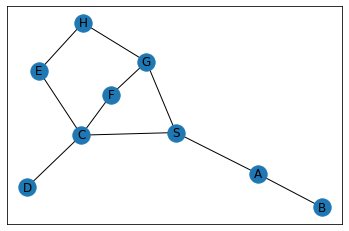

In [0]:
graph_dictt = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}

G = nx.Graph(graph_dict)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)

plt.show()



In [0]:
from collections import defaultdict
g=defaultdict(list)
# g['A']=[]
g['A'].append('B')
g['A'].append('C')
if 'B' not in g['A']:
    g['A'].append('B')
g.values()
for i in g.values():
    print(i)

['B', 'C']


A : ['B', 'S']
B : ['A']
S : ['A', 'C']
C : ['D', 'E', 'F', 'S']
D : ['C']
E : ['C', 'H']
F : ['C']
H : ['E']
dict_items([('A', ['B', 'S']), ('B', ['A']), ('S', ['A', 'C']), ('C', ['D', 'E', 'F', 'S']), ('D', ['C']), ('E', ['C', 'H']), ('F', ['C']), ('H', ['E'])])


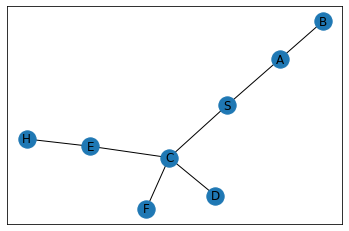

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'F']

In [0]:
import networkx as nx
import matplotlib.pylab as plt
from collections import defaultdict

class Graph: 
    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self,u,v):
        if v not in self.graph[u]:
            self.graph[u].append(v)
        if u not in self.graph[v]:
            self.graph[v].append(u)

#if a print (or any str calls g=Graph(): you can see the return content 
    def __str__(self):
        return str(self.graph.items())
        #return str(self.graph.values())
        #return str(self.graph.keys())

#if a for loop (or any itterator calls g=Graph(): you can see the return content 
    def __iter__(self):
        return iter(self.graph.items())
        #return iter(self.graph.values())
        #return iter(self.graph.keys())
#if a statement says "item x in" it checks if item is in the keys        
    def __contains__(self,n):
        return n in self.graph      

    def traverse_BFS_graph(self, start_node):
        some_graph = self.graph
        visited = []
        to_visit = [start_node]

        while to_visit:
            # current node
            node = to_visit.pop(0)
            # look at keys one by one    
            for nbr in some_graph[node]: 
                if nbr not in visited:
                    # stack nodes in to_visit list
                    to_visit.insert(0,nbr) 
                    # enqueue all nbr nodes to visited list
                    visited.append(nbr)  
        return visited

# push starting vertex to the stack and DFS record (to indicate visited)
# while stack not empty
# read top() element of the stack (top=p) 
# push only one adjacent vertex of p to the stack & DFS record
# if no valid adjacent for p then pop() from stack (visited) 

    def traverse_DFS_graph(self, start_node):
        some_graph = self.graph
        visited = [start_node]
        to_visit = [start_node]
        m=-1
        while to_visit:
            # current node
            node = to_visit[-1]
            # look at keys one by one 
   
            for nbr in some_graph[node]: 
                m=0 
                if nbr not in visited:
                    # stack nodes in to_visit list
                    to_visit.append(nbr) 
                    # enqueue ONLY ONE nbr nodes to visited list
                    visited.append(nbr) 
                    m=1 # found an unvisited neighbor
                    break

            if m==0: # did not find an unvisited neighbor
                to_visit.pop() # look at the node before
               
        return visited

g = Graph()

g.addEdge( 'A','B')
g.addEdge( 'A','S')
g.addEdge( 'C','D')
g.addEdge( 'C','E')
g.addEdge( 'C','F')
g.addEdge( 'C','S')
g.addEdge( 'D','C')
g.addEdge( 'E','C')
g.addEdge( 'E','H')


def plot_graph(g):

    graph_dict=defaultdict()
    for i,j in g:
        graph_dict[i]=j
    G = nx.Graph(graph_dict)
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)

    plt.show() 

for i,j in g:
    print(i,':',j)

print(g)
plot_graph(g)

print("DFS traversal")
g.traverse_DFS_graph('A')




dict_items([((0, 0), [(2, 1), (1, 2)]), ((2, 1), [(0, 0), (0, 2), (1, 3), (3, 3)]), ((1, 2), [(0, 0), (2, 0), (3, 1), (3, 3)]), ((0, 1), [(2, 0), (2, 2), (1, 3)]), ((2, 0), [(0, 1), (1, 2), (3, 2)]), ((2, 2), [(0, 1), (0, 3), (1, 0), (3, 0)]), ((1, 3), [(0, 1), (2, 1), (3, 2)]), ((0, 2), [(1, 0), (2, 1), (2, 3)]), ((1, 0), [(0, 2), (3, 1), (2, 2)]), ((2, 3), [(0, 2), (1, 1), (3, 1)]), ((0, 3), [(1, 1), (2, 2)]), ((1, 1), [(0, 3), (3, 0), (3, 2), (2, 3)]), ((3, 1), [(1, 0), (1, 2), (2, 3)]), ((3, 0), [(1, 1), (2, 2)]), ((3, 2), [(1, 1), (1, 3), (2, 0)]), ((3, 3), [(1, 2), (2, 1)])])


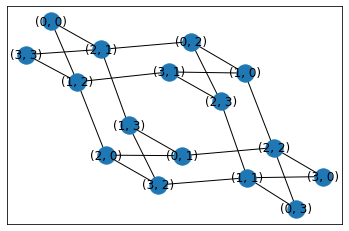

In [0]:
import networkx as nx
# To creat Knight’s Tour graph
# try 8 possible moves 1by1 if the night is within chessboard area
# keep visiting unvisited squares till every square is visited

# DFS is used to solve the knight’s tour search problem:
## start from top left corner (0,0) and go back if you see deadend
# exploring one branch of the tree as deeply as possible

# buid a graph
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph=defaultdict(list)
    def addEdge(self,i,j):
        if j not in self.graph[i]:
            self.graph[i].append(j)
        if i not in self.graph[j]:
            self.graph[j].append(i)  

    def __iter__(self):
        return iter(self.graph.items())

    def __str__(self):
        return str(self.graph.items())   

    def __contains__(self,n):
        return n in self.graph   

def build_chessboard_graph(board_size):
    g=Graph()
    for row in range(board_size):
        for col in range(board_size):
            for to_row, to_col in legal_moves_from(row, col, board_size):
                g.addEdge((row,col),(to_row,to_col))
    return g

def legal_moves_from(row, col, board_size):
    MOVE_OFFSETS = ((-1, -2), ( 1, -2), (-2, -1), ( 2, -1), 
                    (-2,  1), ( 2,  1),(-1,  2), ( 1,  2) )
    for row_offset, col_offset in MOVE_OFFSETS:
        to_row, to_col = row + row_offset, col + col_offset
        if 0 <= to_row < board_size and 0 <= to_col < board_size:
            yield to_row, to_col


# def DFS_knite(g,start_node):
#     graph_dict=convGraph2Dict(g)
#     some_graph = convGraph2Dict(g)
#     visited = [start_node]
#     to_visit = [start_node]
#     m=-1

#     while to_visit:
#         # current node
#         node = to_visit[-1]
#         # look at keys one by one 
#         for nbr in some_graph[node]: 
#             m=0 
#             if nbr not in visited:
#                 # stack nodes in to_visit list
#                 to_visit.append(nbr) 
#                 # enqueue ONLY ONE nbr nodes to visited list
#                 visited.append(nbr) 
#                 m=1 # found an unvisited neighbor
#                 break

#         if m==0: # did not find an unvisited neighbor
#             to_visit.pop() # look at the node before
#             visited.pop()
            
#     return visited





def convGraph2Dict(g):
    graph_dict=defaultdict()
    for i,j in g:
        graph_dict[i]=j
    return  graph_dict 

def plot_graph(g):
    graph_dict=convGraph2Dict(g)
    G = nx.Graph(graph_dict)
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G,pos)
    nx.draw_networkx_edges(G,pos)
    nx.draw_networkx_labels(G,pos)

    plt.show()    

start_node=(0,0)
# traverse_DFS_graph(g, start_node)



g=build_chessboard_graph(4)
print(g)

plot_graph(g)

# doesn't work DFS_knite(g,(0,0))




##Dijkstra (single-source shortest-path algorithm)
 “Dijkstra” single-source shortest-path. It determines the shortest path from initial node "a" (as if it is root of a tree) to every other node "b" (as if it is a child or child of a child) on a weighted graph. 
 
Dijkstra does not work with negative weight graphs. It relies on one "simple" fact: if all weights are non-negative, adding an edge can never make a path shorter. That's why picking the shortest candidate edge (local optimality) always ends up being correct (global optimality).

##Floyd-Warshall (all-pairs shortest path algorithm)

Floyd-Warshall is used when any of all the nodes can be a source, so you want the shortest distance to reach any destination node from any source node. computes the shortest paths between every pair of nodes. Another example is "for each node v, run Dijkstra with v as the source node". This only fails when there are negative cycles.

##Bellman-Ford (single-source shortest-path algorithm)

Bellman-Ford is used like Dijkstra's, when there is only one source. This can handle negative weights and reports negative cycle (we should not have a cycle when the sum of the weights is negative) and its working is the same as Floyd-Warshall's except for one source. 

Bellman-Ford and Floyd-Warshall are similar—for example, they're both dynamic programming algorithms—but Floyd-Warshall is not the same algorithm as "for each node v, run Bellman-Ford with v as the source node". In particular, Floyd-Warshall runs in 𝑂(𝑉3) time, while repeated-Bellman-Ford runs in 𝑂(𝑉2𝐸) time (𝑂(𝑉𝐸) time for each source vertex).

In [0]:
def Dijkstra(root,dict):
    # Base case distance of nodes connected directly to root
    # db = {'A': 5, 'D': 1, 'G': 2, 'B': 0 , 'C': None , 'E': None, 'F': None}
    # create a dict with distances from base root
    
    # we initialize by considering distance from everu node to root is None
    db={i:None for i in d}
    # we set the distance from the root to root as 0
    db[root]=0
    # we set the distance from the nodes connect to root directly to root from dict
    for i,j in d[root].items():
        db[i]=j

    # set distance from other nodes to root by traversing to the root via known nodes in db
    for i in db: # ('A'*,'D','G')    db = {'A':5, 'D': 1, 'G': 2}
        if db[i]: # have an identified distance to root (not None)
            for j in d[i]: # connected to roo through another nodewhich we know the distance from root to 
                dist_a = db[i] + d[i][j]  # indirected cost to root=cost to root+ cost to node connected to root= db['A']+ d['A']['E'] = 5+12
                if db[j]==None: 
                    dist = dist_a
                else:
                    dist = min(dist_a,db[j])
                db[j]=dist
    return db



root='B'
d = {
    'B': {'A': 5, 'D': 1, 'G': 2},
    'A': {'B': 5, 'D': 3, 'E': 12, 'F' :5},
    'D': {'B': 1, 'G': 1, 'E': 1, 'A': 3},
    'G': {'B': 2, 'D': 1, 'C': 2},
    'C': {'G': 2, 'E': 1, 'F': 16},
    'E': {'A': 12, 'D': 1, 'C': 1, 'F': 2},
    'F': {'A': 5, 'E': 2, 'C': 16}}

dist2everynode=Dijkstra(root,dict)
print('shortest dist from',root,'to every node is',dist2everynode)



shortest dist from B to every node is {'B': 0, 'A': 4, 'D': 1, 'G': 2, 'C': 3, 'E': 2, 'F': 4}



1-Convert to graph

2-inf on unseen nodes

3-start 0,0

4-Loop: relax node/add cost to seen edge/mark node as visit

5-find min value cost on seen but not visited nodes

6-Return value end n, n

In [0]:
def minPathSum(self, grid: List[List[int]]) -> int:
    row =  len(grid)
    column = len(grid[0])
    
    # Craft graphs
    heap = []
    sum = defaultdict(list)
    cost = defaultdict(list)
    graph = defaultdict(list)
    seen = defaultdict(list)
    for r in range (0, row):
        for c in range (0, column):
            sum[r,c] = float('inf')
            cost[r,c].append(grid[r][c])
            # check right
            if c < column - 1:
                graph[r,c].append([r,c+1])
            # check down
            if r < row - 1:
                graph[r,c].append([r+1,c])

    # Setup for start and end
    min_node = (0,0)
    end_node = ((row-1),(column-1))   
    sum[(min_node)] = cost.get(min_node)[0]
    seen[(min_node)] = True
    
    while len(seen) > 0:
        # check attached nodes
        if graph.get(min_node):
            # Visit next mini-value node and relax it's edge
            for node in graph.get(min_node):
                n = tuple(node)
                visit_cost = cost.get(n)[0] + (sum.get(min_node))
                # Check if relaxing has reduced the cost
                if visit_cost < sum.get(n):
                    # Update the cost for each updated node
                    sum[(n)] = visit_cost
                    # Add to head future nodes to visit
                    heappush(heap, (visit_cost, n))
                    seen[(n)] = True

        seen.pop(min_node)

        # Check Next Cost Optimized with a heap
        if len(heap) > 0:
            next_min_node = heappop(heap)[1]
            min_node = next_min_node

    return sum.get(end_node)

## Prims (finds min spanning tree)


For more questions and samples refer to:
[link text](https://medium.com/@kingrayhan/500-data-structures-and-algorithms-practice-problems-and-their-solutions-b45a83d803f0)

